# Análise de Médias Móveis (COVID-19)<br>
# (TAIL - Technology and Artificial Intelligence League)


---

O **objetivo** desse notebook é utilizar os dados de **COVID-19** do Ministério da Saúde (Brasil) para visualizá-los utilizando **médias móveis**.

**Desenvolvido pela integrante:** <a href="https://www.linkedin.com/in/anaclarachaves">Ana Clara Chaves Sousa</a>

## 1. Importação da biblioteca e dos dados

In [8]:
# Importando as bibliotecas iniciais
import pandas as pd
import numpy as np

In [9]:
# Importando a biblioteca matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

**OBS:** Os dados utilizados para essa análise estão <a href="https://drive.google.com/file/d/1yZgliUIt4M3DjsP2U8xa_uCsBwwEiVnM/view?usp=sharing">nesse link</a>. Você pode baixar para utilizar.<br>
Caso queira dados atualizados, você pode baixar diretamente pelo site do <a href="https://covid.saude.gov.br/">Ministério da Saúde</a>.

In [10]:
# Importando os dados 
df = pd.read_csv('/content/drive/My Drive/DATA SCIENCE/HIST_PAINEL_COVIDBR_06out2020.csv', sep=';')

In [11]:
# Visualizando o número de linhas e colunas
df.shape

(1090954, 17)

## 2. Visualização do dataframe

Ao invés de usar diversas funções [como df.head(), df.describe()] para pré-visualizar os dados, vou usar apenas a função df.profile_report() que é mais prática e já mostra diversas informações estatísticas, correlações (não só de pearson), histogramas, etc.

In [ ]:
# Instalando a biblioteca pandas-profiling
!pip install -U pandas-profiling

In [13]:
# Importando a biblioteca instalada
import pandas_profiling

# Utilizando o código para visualizar os dados
df.profile_report()

Para continuar com a visualização dos dados, agora vamos ver os itens únicos de cada coluna para saber o que pode ser feito a partir do dataframe.

In [14]:
# Visualizando os valores únicos de cada coluna
for col in df:
    print(col)
    print(df[col].unique())
    print('A quantidade de valores únicos é: ', df[col].nunique())
    print('\n')

regiao
['Brasil' 'Norte' 'Nordeste' 'Sudeste' 'Sul' 'Centro-Oeste']
A quantidade de valores únicos é:  6


estado
[nan 'RO' 'AC' 'AM' 'RR' 'PA' 'AP' 'TO' 'MA' 'PI' 'CE' 'RN' 'PB' 'PE' 'AL'
 'SE' 'BA' 'MG' 'ES' 'RJ' 'SP' 'PR' 'SC' 'RS' 'MS' 'MT' 'GO' 'DF']
A quantidade de valores únicos é:  27


municipio
[nan "Alta Floresta D'Oeste" 'Ariquemes' ... 'Vila Boa' 'Vila Propício'
 'Brasília']
A quantidade de valores únicos é:  5297


coduf
[76 11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 29 31 32 33 35 41 42 43
 50 51 52 53]
A quantidade de valores únicos é:  28


codmun
[    nan 110000. 110001. ... 522220. 522230. 530010.]
A quantidade de valores únicos é:  5591


codRegiaoSaude
[   nan 11005. 11001. 11006. 11002. 11007. 11004. 11003. 12002. 12001.
 12003. 13008. 13009. 13002. 13003. 13001. 13005. 13006. 13007. 13004.
 14001. 14002. 15011. 15003. 15007. 15013. 15001. 15002. 15012. 15014.
 15006. 15009. 15008. 15010. 15004. 16001. 16002. 16003. 17007. 17002.
 17005. 17003. 17006. 17001. 170

## 3. Médias móveis

A análise de médias móveis para esse dataframe será feita a partir de cada semana para cada região do país.

### 3.1. Criação de novos dataframes

Para fazer a análise de médias móveis por região, vou criar novos dataframes para cada uma delas.

In [15]:
# Criando o dataframe para a região Norte
df_norte = df[df['regiao'] == 'Norte']

In [16]:
# Visualizando o shape do novo dataframe
df_norte.shape

(89457, 17)

In [17]:
# Criando o dataframe para a região Nordeste
df_nordeste = df[df['regiao'] == 'Nordeste']

In [18]:
# Visualizando o shape do novo dataframe
df_nordeste.shape

(351807, 17)

In [19]:
# Criando o dataframe para a região Sul
df_sul = df[df['regiao'] == 'Sul']

# Visualizando o shape
df_sul.shape

(232311, 17)

In [20]:
# Criando o dataframe para a região Centro-Oeste
df_centrooeste = df[df['regiao'] == 'Centro-Oeste']

# Visualizando o shape
df_centrooeste.shape

(91886, 17)

In [21]:
# Criando o dataframe para a região Sudeste
df_sudeste = df[df['regiao'] == 'Sudeste']

# Visualizando o shape
df_sudeste.shape

(325268, 17)

### 3.2. Organização dos dados por semana

Para fazer o cálculo de médias móveis, irei agrupar os dados por semana, somando-os (começando da semana 9 até a semana 41, que são as informações encontradas no dataframe).

In [22]:
# Organizando o dataframe por semana (Região Norte)
df_norte = df_norte.groupby('semanaEpi').sum()

In [23]:
# Organizando o dataframe por semana (Região Nordeste)
df_nordeste = df_nordeste.groupby('semanaEpi').sum()

In [24]:
# Organizando o dataframe por semana (Região Centro-Oeste)
df_centrooeste = df_centrooeste.groupby('semanaEpi').sum()

In [25]:
# Organizando o dataframe por semana (Região Sul)
df_sul = df_sul.groupby('semanaEpi').sum()

In [26]:
# Organizando o dataframe por semana (Região Sudeste)
df_sudeste = df_sudeste.groupby('semanaEpi').sum()

Agora, vamos dropar colunas que não serão utilizadas na nossa análise.

In [27]:
# Visualizando o dataframe da região Norte para exemplificar
df_norte.tail()

coduf       codmun  ...  emAcompanhamentoNovos  interior/metropolitana
semanaEpi                      ...                                               
37         47397  468814556.0  ...                    0.0                   329.0
38         47397  468814556.0  ...                    0.0                   329.0
39         47397  468814556.0  ...                    0.0                   329.0
40         47397  468814556.0  ...                    0.0                   329.0
41         20313  200920524.0  ...                    0.0                   141.0

[5 rows x 11 columns]

In [28]:
# Deletando as colunas que não serão usadas
df_norte.drop(columns=["coduf", "codmun", "codRegiaoSaude", "populacaoTCU2019", "Recuperadosnovos", "emAcompanhamentoNovos", "interior/metropolitana", "casosAcumulado", "obitosAcumulado"], inplace = True)

In [29]:
# Visualizando o novo dataframe da Região Norte
df_norte.head()

casosNovos  obitosNovos
semanaEpi                         
9                   0            0
10                  0            0
11                  0            0
12                 26            0
13                342            2

Agora, farei o mesmo processo para as outras quatro regiões do país.

In [30]:
# Deletando as colunas que não serão usadas (Região Nordeste)
df_nordeste.drop(columns=["coduf", "codmun", "codRegiaoSaude", "populacaoTCU2019", "Recuperadosnovos", "emAcompanhamentoNovos", "interior/metropolitana", "casosAcumulado", "obitosAcumulado"], inplace = True)

In [31]:
# Deletando as colunas que não serão usadas (Região Centro-Oeste)
df_centrooeste.drop(columns=["coduf", "codmun", "codRegiaoSaude", "populacaoTCU2019", "Recuperadosnovos", "emAcompanhamentoNovos", "interior/metropolitana", "casosAcumulado", "obitosAcumulado"], inplace = True)

In [32]:
# Deletando as colunas que não serão usadas (Região Sul)
df_sul.drop(columns=["coduf", "codmun", "codRegiaoSaude", "populacaoTCU2019", "Recuperadosnovos", "emAcompanhamentoNovos", "interior/metropolitana", "casosAcumulado", "obitosAcumulado"], inplace = True)

In [33]:
# Deletando as colunas que não serão usadas (Região Sudeste)
df_sudeste.drop(columns=["coduf", "codmun", "codRegiaoSaude", "populacaoTCU2019", "Recuperadosnovos", "emAcompanhamentoNovos", "interior/metropolitana", "casosAcumulado", "obitosAcumulado"], inplace = True)

### 3.3. Médias Móveis por Região 

Agora, já temos os dados limpos para partir para as médias móveis.

**Objetivo:** Visualizar graficamente as médias móveis de cada região considerando as 2 semanas anteriores. Serão plotados dois gráficos para cada região: um de *casos novos* e outro de *óbitos*.

#### Região Norte

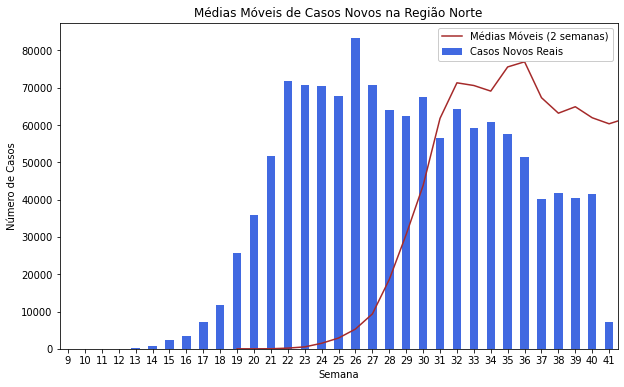

In [34]:
# Criando um gráfico de barras para mostrar os casos reais da Região Norte
df_norte['casosNovos'].plot(figsize=(10,6), kind="bar", color="RoyalBlue", label="Casos Novos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de 2 semanas
df_norte['casosNovos'].rolling(window=2).mean().plot(color='Brown', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Casos Novos na Região Norte")
plt.xlabel("Semana")
plt.ylabel("Número de Casos")
plt.legend(framealpha=2, frameon=True)

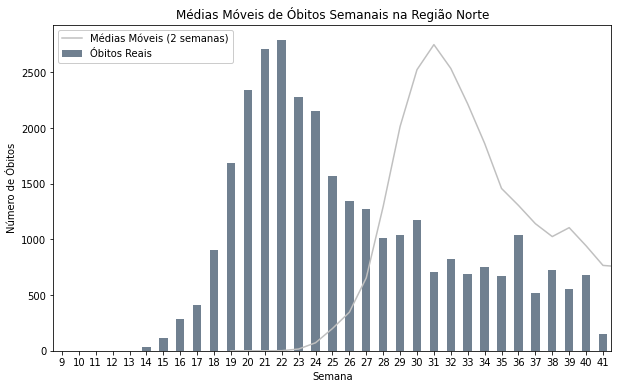

In [35]:
# Criando um gráfico de barras para mostrar os óbitos reais da Região Norte
df_norte['obitosNovos'].plot(figsize=(10,6), kind="bar", color="slategray", label="Óbitos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de óbitos de 2 semanas
df_norte['obitosNovos'].rolling(window=2).mean().plot(color='silver', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Óbitos Semanais na Região Norte")
plt.xlabel("Semana")
plt.ylabel("Número de Óbitos")
plt.legend(framealpha=2, frameon=True)

#### Região Nordeste

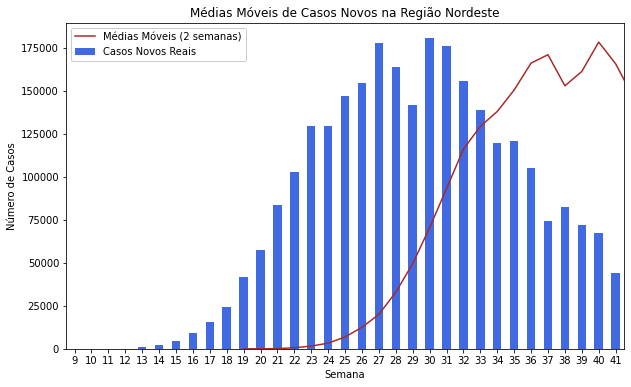

In [36]:
# Criando um gráfico de barras para mostrar os casos reais da Região Nordeste
df_nordeste['casosNovos'].plot(figsize=(10,6), kind="bar", color="RoyalBlue", label="Casos Novos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de 2 semanas
df_nordeste['casosNovos'].rolling(window=2).mean().plot(color='Brown', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Casos Novos na Região Nordeste")
plt.xlabel("Semana")
plt.ylabel("Número de Casos")
plt.legend(framealpha=2, frameon=True)

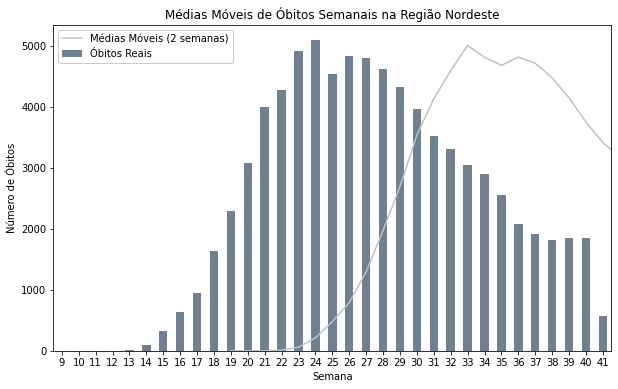

In [37]:
# Criando um gráfico de barras para mostrar os óbitos reais da Região Nordeste
df_nordeste['obitosNovos'].plot(figsize=(10,6), kind="bar", color="slategray", label="Óbitos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de óbitos de 2 semanas
df_nordeste['obitosNovos'].rolling(window=2).mean().plot(color='silver', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Óbitos Semanais na Região Nordeste")
plt.xlabel("Semana")
plt.ylabel("Número de Óbitos")
plt.legend(framealpha=2, frameon=True)

#### Região Sul

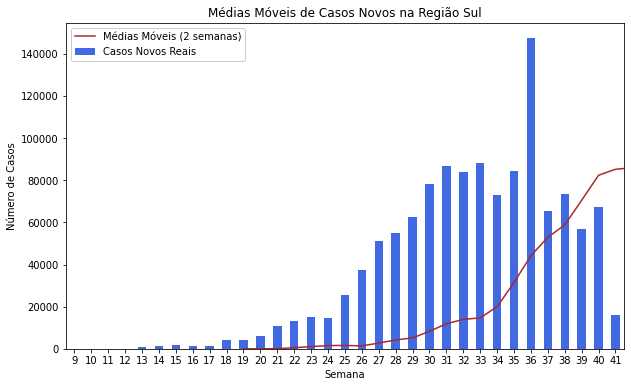

In [38]:
# Criando um gráfico de barras para mostrar os casos reais da Região Sul
df_sul['casosNovos'].plot(figsize=(10,6), kind="bar", color="RoyalBlue", label="Casos Novos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de 2 semanas
df_sul['casosNovos'].rolling(window=2).mean().plot(color='Brown', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Casos Novos na Região Sul")
plt.xlabel("Semana")
plt.ylabel("Número de Casos")
plt.legend(framealpha=2, frameon=True)

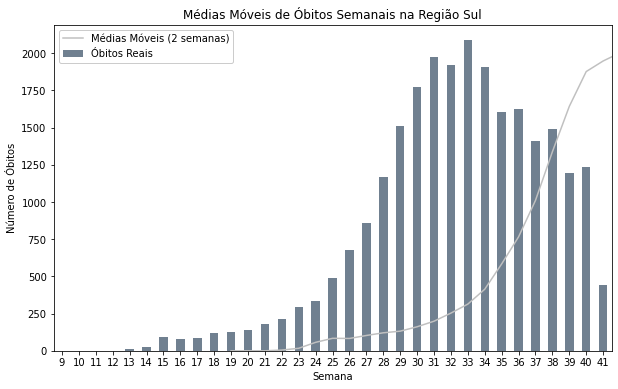

In [39]:
# Criando um gráfico de barras para mostrar os óbitos reais da Região Sul
df_sul['obitosNovos'].plot(figsize=(10,6), kind="bar", color="slategray", label="Óbitos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de óbitos de 2 semanas
df_sul['obitosNovos'].rolling(window=2).mean().plot(color='silver', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Óbitos Semanais na Região Sul")
plt.xlabel("Semana")
plt.ylabel("Número de Óbitos")
plt.legend(framealpha=2, frameon=True)

#### Região Sudeste

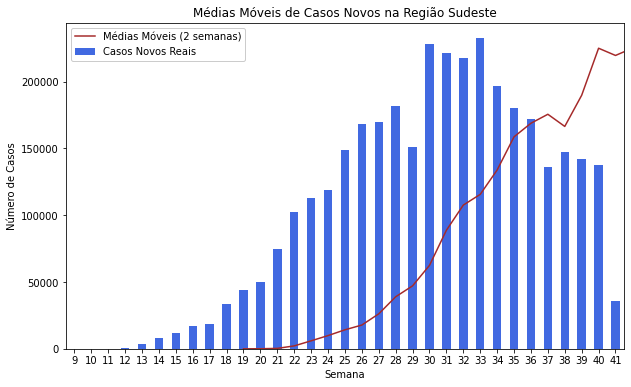

In [40]:
# Criando um gráfico de barras para mostrar os casos reais da Região Sudeste
df_sudeste['casosNovos'].plot(figsize=(10,6), kind="bar", color="RoyalBlue", label="Casos Novos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de 2 semanas
df_sudeste['casosNovos'].rolling(window=2).mean().plot(color='Brown', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Casos Novos na Região Sudeste")
plt.xlabel("Semana")
plt.ylabel("Número de Casos")
plt.legend(framealpha=2, frameon=True)

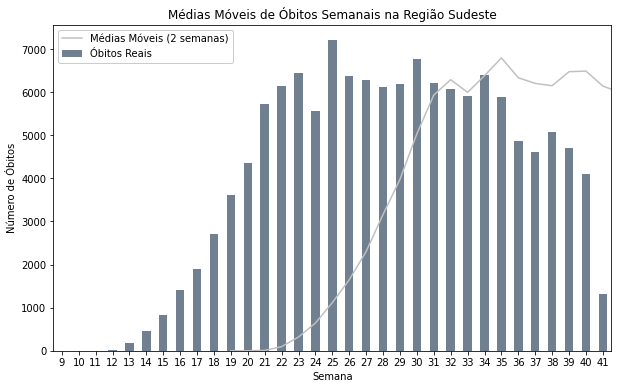

In [41]:
# Criando um gráfico de barras para mostrar os óbitos reais da Região Sudeste
df_sudeste['obitosNovos'].plot(figsize=(10,6), kind="bar", color="slategray", label="Óbitos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de óbitos de 2 semanas
df_sudeste['obitosNovos'].rolling(window=2).mean().plot(color='silver', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Óbitos Semanais na Região Sudeste")
plt.xlabel("Semana")
plt.ylabel("Número de Óbitos")
plt.legend(framealpha=2, frameon=True)

#### Região Centro-Oeste

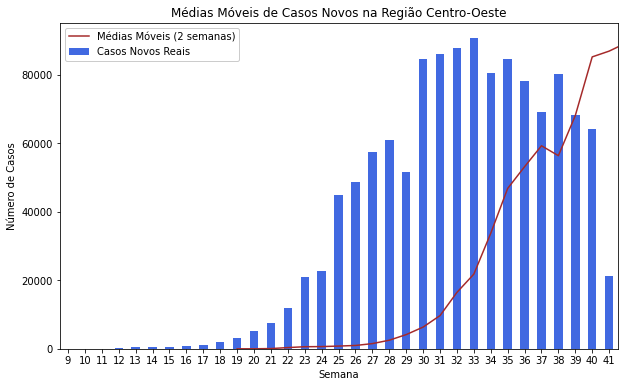

In [42]:
# Criando um gráfico de barras para mostrar os casos reais da Região Centro-Oeste
df_centrooeste['casosNovos'].plot(figsize=(10,6), kind="bar", color="RoyalBlue", label="Casos Novos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de 2 semanas
df_centrooeste['casosNovos'].rolling(window=2).mean().plot(color='Brown', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Casos Novos na Região Centro-Oeste")
plt.xlabel("Semana")
plt.ylabel("Número de Casos")
plt.legend(framealpha=2, frameon=True)

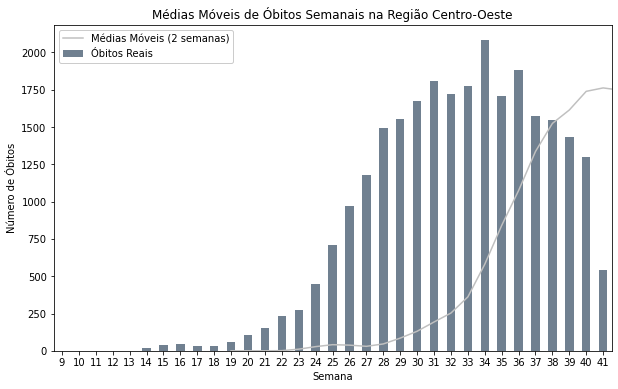

In [43]:
# Criando um gráfico de barras para mostrar os óbitos reais da Região Centro-Oeste
df_centrooeste['obitosNovos'].plot(figsize=(10,6), kind="bar", color="slategray", label="Óbitos Reais")

# Criando um gráfico de linhas para mostrar a média móvel de óbitos de 2 semanas
df_centrooeste['obitosNovos'].rolling(window=2).mean().plot(color='silver', label="Médias Móveis (2 semanas)")

# Adicionando o título do gráfico e os textos dos eixos X e Y para melhor visualização
plt.title("Médias Móveis de Óbitos Semanais na Região Centro-Oeste")
plt.xlabel("Semana")
plt.ylabel("Número de Óbitos")
plt.legend(framealpha=2, frameon=True)